# Crypto Twitter Project
I use the word "crypto" since I am curious about the current progress of digital assets or online currency through medias like twitter.

In [34]:
#import the required operating systems for files
import os

#import the pandas for dataframe type imports
import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

#import collections for collection based data
import collections

#import tweets through tweepy
import tweepy as tweepy

#import nltk for natural processing language
import nltk
from nltk.corpus import stopwords
import re
import networkx

#import warnings to filter out warning messages
import warnings
warnings.filterwarnings("ignore")


In [35]:
#input the required keys and tokens from API twitter account
#this gives access to keys for this user

access_token = '1393796423548764163-fcviuYaSPA5NVs73Sw8Kw58HjxzTYN'
access_secret = 'Qn2Y0RhKFFxdILDGJKhgODftCYjaLM8qh9ndlRgCgK2XV'
consumer_key = 'zGcvih5su5z6UsvgFGQsr4AFC'
consumer_secret = 'vdJlimJO84yEYRGmkrs3VXao1K0dMfLaIrpQaUB91Er8kEk3WC'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
twitter_api = tweepy.API(auth)

print(twitter_api)

# Collecting Tweets

In [36]:
#The hashtags that I will be using is of my interests and that would be Cryptocurrency. Cryptocurrency is an online based  
#currency or digital asset designed to be used as a medium of exchange through a decentralized body called blockchain.
#used search_word to search and define the specific variable I am looking for

search_words = '#crypto OR #cryptocurrency'
date_since = '2021-5-1'

In [37]:
#on this part of the search process, I want only a specific number of items to appear as to filter out all other tweets, 
#since there is too much to look through

#collect tweets
tweets = tweepy.Cursor(twitter_api.search,
                      q=search_words,
                      land="en",
                      since=date_since).items(5)

#Collect a list of tweets
[tweet.text for tweet in tweets]

['RT @HTMoon_Finance: 📦AIRDROP IS HAPPENING\n\n🪂We are airdropping 6,000,000,000,000 $HTMOON tokens in partnership with @airdropinspect!\n\n💎Each…',
 'RT @HTMoon_Finance: 📦AIRDROP IS HAPPENING\n\n🪂We are airdropping 6,000,000,000,000 $HTMOON tokens in partnership with @airdropinspect!\n\n💎Each…',
 'RT @RobelT2021: @davidgokhshtein $SPHRI @SpheriumFinance  is so hot right now!\n\nLending and Borrowing Protocol with a user-centric design\nD…',
 'RT @funnybirdnft: ☄️ FunnybirdNFT Airdrop\n💵 Total rewards : $10\n👨\u200d👩\u200d👧\u200d👧 Refferal : $3\n🏦 Listed : JulSwap DEX\n(https://t.co/NoxDtqVyym)\n🔍 Fo…',
 '@1982Pedro1982 Next 30 days all #TELFAM let’s massive promote on all our social media’s \n\nJune announcements +… https://t.co/vj5qC6Qu15']

# Remove Retweets

In [38]:
#in this part of the code I removed retweets to make sure that I avoid duplicates of the same post that might skew the data
new_search = search_words + "-filter:retweets"
new_search

'#crypto OR #cryptocurrency-filter:retweets'

In [39]:
#similar to searching and collecting tweets, I did the same process here but without retweets
tweets = tweepy.Cursor(twitter_api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(5)

[tweet.text for tweet in tweets]

['@kidzwillcuss Boxxheads is a collection of 1/1 unique pieces.  Choose your favourite!\n\nhttps://t.co/EW0Z746XqO… https://t.co/hekul3mBLa',
 'Crypto Trader Who Accurately Called Bitcoin Collapse Predicts Return of Bull Market – Here’s When… https://t.co/FqU7X3MpyB',
 '@HTMoon_Finance @airdropinspect @HuobiGlobal Great project and strong team in a predictable and transparent road ma… https://t.co/XO1FO1CGIo',
 '$UST peg is fine -- stable at $1. Currently working With Coingecko on rectifying the data issue.…… https://t.co/1yNFO6dZJ8',
 '@NFTBeast3 Well organized legit project. I believe this project has a bright future and I am happy to be part of th… https://t.co/HgiD2L8FQs']

In [40]:
#I was curious about who tweeted these and so I put this code here to see who did that and from what location they tweeted from
tweets = tweepy.Cursor(twitter_api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(5)

users_locs = [[tweet.user.screen_name, tweet.user.location] for tweet in tweets]
users_locs

[['chaosbyjay', ''],
 ['GustafCrypto', 'Global'],
 ['Susanto90630850', ''],
 ['GustafCrypto', 'Global'],
 ['Chenche16549124', '']]

In [41]:
#convverted the list above into a pandas dataframe
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location"])
tweet_text

,user,location
0,chaosbyjay,
1,GustafCrypto,Global
2,Susanto90630850,
3,GustafCrypto,Global
4,Chenche16549124,


# Customize Queries in Twitter

In [42]:
#to see a specific implimentation of subjects I create a list that is queried

new_search = 'crypto+elon' +'-filter:retweets'

tweets = tweepy.Cursor(twitter_api.search,
                       q=new_search,
                       lang="en",
                       since=date_since).items(1000)

all_tweets = [tweet.text for tweet in tweets]
all_tweets[:5]

['Daily Dose: Elon Musk- The Man who never give up. https://t.co/NBRSXuKvIA\n\n#realmeX7Max5G #cancelboardexam2021… https://t.co/AFH9gxH2jr',
 "The reason I keep checking my Twitter handle every few minutes is Elon Musk. Because skipping on  Elon's single twe… https://t.co/a9BHoZORmY",
 '@trader1sz @imBagsy The 3 most used crypto expression on Twitter 2021 : \n- Bullish\n- Bearish \n- This time will be d… https://t.co/EtXAfd70ug',
 'Experts answer: How does Elon Musk affect crypto space?',
 'Experts in crypto and blockchain answer the question: How do all these Elon Musk comments affect the entire crypto… https://t.co/hXtDyrl36Y']

# Remove URLs (links)

In [43]:
#since i will be doing word counts in this part of the code 
#define a function to remove urls 
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [45]:
#to check if the urls are still there i put this code here to check whether it is still present
all_tweets_no_urls = [remove_url(tweet) for tweet in all_tweets]
all_tweets_no_urls[:5]

['Daily Dose Elon Musk The Man who never give up realmeX7Max5G cancelboardexam2021',
 'The reason I keep checking my Twitter handle every few minutes is Elon Musk Because skipping on Elons single twe',
 'trader1sz imBagsy The 3 most used crypto expression on Twitter 2021 Bullish Bearish This time will be d',
 'Experts answer How does Elon Musk affect crypto space',
 'Experts in crypto and blockchain answer the question How do all these Elon Musk comments affect the entire crypto']

In [46]:
#now split the words from one tweet into many unique seperate entities
all_tweets_no_urls[0].lower().split()

['daily',
 'dose',
 'elon',
 'musk',
 'the',
 'man',
 'who',
 'never',
 'give',
 'up',
 'realmex7max5g',
 'cancelboardexam2021']

In [48]:
#now create a list of lists from the previous code containing the lowercase words for each tweet
#making sure that all the words are lowercase
words_in_tweets = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweets[:5]


[['daily',
  'dose',
  'elon',
  'musk',
  'the',
  'man',
  'who',
  'never',
  'give',
  'up',
  'realmex7max5g',
  'cancelboardexam2021'],
 ['the',
  'reason',
  'i',
  'keep',
  'checking',
  'my',
  'twitter',
  'handle',
  'every',
  'few',
  'minutes',
  'is',
  'elon',
  'musk',
  'because',
  'skipping',
  'on',
  'elons',
  'single',
  'twe'],
 ['trader1sz',
  'imbagsy',
  'the',
  '3',
  'most',
  'used',
  'crypto',
  'expression',
  'on',
  'twitter',
  '2021',
  'bullish',
  'bearish',
  'this',
  'time',
  'will',
  'be',
  'd'],
 ['experts',
  'answer',
  'how',
  'does',
  'elon',
  'musk',
  'affect',
  'crypto',
  'space'],
 ['experts',
  'in',
  'crypto',
  'and',
  'blockchain',
  'answer',
  'the',
  'question',
  'how',
  'do',
  'all',
  'these',
  'elon',
  'musk',
  'comments',
  'affect',
  'the',
  'entire',
  'crypto']]

In [50]:
#list all words from the tweets, creating a kind of dictionary of words
all_words_no_urls = list(itertools.chain(*words_in_tweets))

#create a counter
counts_no_urls = collections.Counter(all_words_no_urls)

counts_no_urls.most_common(15)

[('elon', 525),
 ('crypto', 489),
 ('the', 454),
 ('kissmymoon', 393),
 ('musk', 303),
 ('for', 287),
 ('with', 253),
 ('moon', 224),
 ('to', 222),
 ('rocket', 201),
 ('presale', 199),
 ('open', 199),
 ('whitelist', 198),
 ('kiss', 197),
 ('together', 197)]

In [51]:
#based on what is given from above, this can be created as a dataframe through pandas for analysis
#creation of pandas dataframe through analyze and plot of the top 15 common words
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,elon,525
1,crypto,489
2,the,454
3,kissmymoon,393
4,musk,303


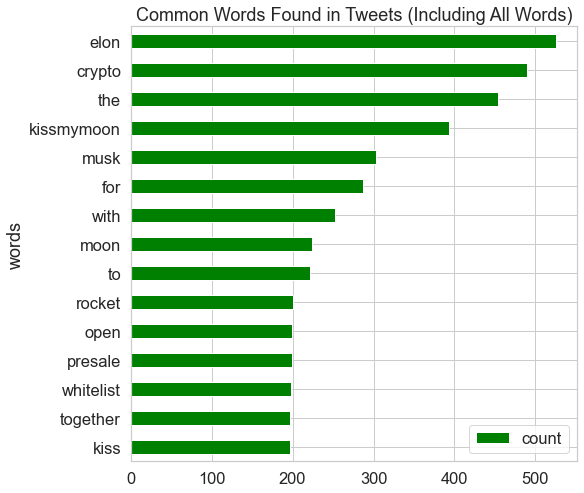

In [54]:
#using the dataframe that was just created, we will visualize the unique common words
#i set the font for grid lines to appear in the graph
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

**Remove Stopwords with nltk**
- Other than lowercase words, there are additional clean-ups such as removing words that do not add meaningful information to the text that we are trying to analyze
- "Stop words" are referred to as words that are commonly used such as who, what, you, the, etc.

In [55]:
#use nltk download for stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# View some words from the set
list(stop_words)[0:10]

[nltk_data] Downloading package stopwords to C:\Users\William
[nltk_data]     Ku\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['mightn',
 'been',
 'nor',
 'needn',
 'does',
 'other',
 're',
 'herself',
 'doesn',
 'mustn']

In [60]:
#now that we know that all the words are lowercased, the next step is to all stop words in the tweet.

#lets have a look at what the original set looks like before going forward
words_in_tweets[0]

['daily',
 'dose',
 'elon',
 'musk',
 'the',
 'man',
 'who',
 'never',
 'give',
 'up',
 'realmex7max5g',
 'cancelboardexam2021']

In [63]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words_in_tweets]

tweets_nsw[0]

['daily',
 'dose',
 'elon',
 'musk',
 'man',
 'never',
 'give',
 'realmex7max5g',
 'cancelboardexam2021']

In [64]:
#now redo the count for the most common words
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('elon', 525),
 ('crypto', 489),
 ('kissmymoon', 393),
 ('musk', 303),
 ('moon', 224),
 ('rocket', 201),
 ('presale', 199),
 ('open', 199),
 ('whitelist', 198),
 ('kiss', 197),
 ('together', 197),
 ('rock', 196),
 ('bitcoin', 172),
 ('affect', 111),
 ('experts', 106)]

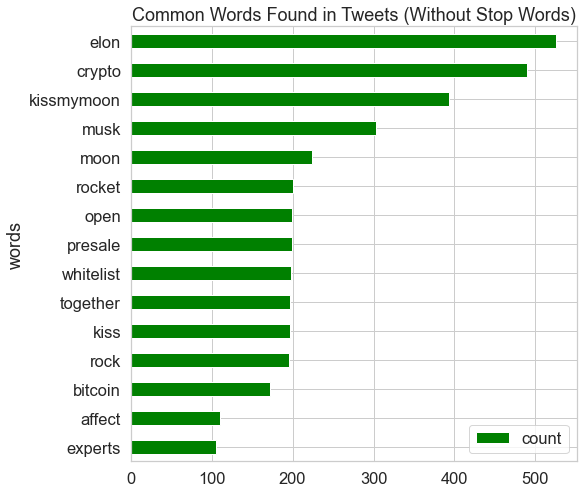

In [66]:
#now that list is done, lets do another graph, this time without the stop words.
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

**Removing Collection Words**
- Other than removing stop words, it is also common to remove collection words as to not skew the data
- "crypto, elon, musk" would be collection terms and thus found in each tweet, which can skew the word frequency analysis

In [71]:
collection_words = ['crypto', 'elon', 'musk', 'elonmusk']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]

In [72]:
#next we compare from the original
tweets_nsw[0]

['daily',
 'dose',
 'elon',
 'musk',
 'man',
 'never',
 'give',
 'realmex7max5g',
 'cancelboardexam2021']

In [73]:
tweets_nsw_nc[0]

['daily',
 'dose',
 'man',
 'never',
 'give',
 'realmex7max5g',
 'cancelboardexam2021']

**Plot Word Frequency of Clean Tweets**
- Now the data has been cleaned, its ready to be calculated and ploted for its final word frequency analysis

In [74]:
# Flatten list of words in clean tweets
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))

# Create counter of words in clean tweets
counts_nsw_nc = collections.Counter(all_words_nsw_nc)

counts_nsw_nc.most_common(15)

[('kissmymoon', 393),
 ('moon', 224),
 ('rocket', 201),
 ('presale', 199),
 ('open', 199),
 ('whitelist', 198),
 ('kiss', 197),
 ('together', 197),
 ('rock', 196),
 ('bitcoin', 172),
 ('affect', 111),
 ('experts', 106),
 ('space', 105),
 ('dogecoin', 105),
 ('answer', 96)]

In [75]:
#this is used to find out how many unique words across all tweets using len()
len(counts_nsw_nc)

2519

In [76]:
#then we use a pandas dataframe of the words and their counts and plots to display the top 15 common words
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,kissmymoon,393
1,moon,224
2,rocket,201
3,presale,199
4,open,199


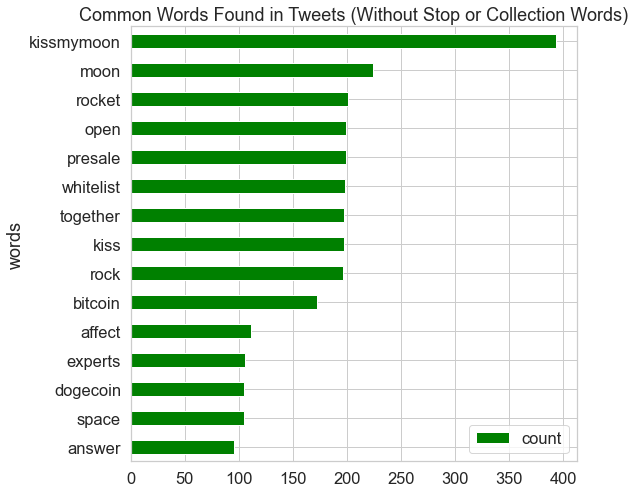

In [78]:
#use a plot graph to displsy the dataframe created from the pandas.
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="green")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

**Conclusion**
- It appears that the words that are used the most is kissmymoon which is a term that was used when one of the crypto coins was in term "going to the moon". Right behind that word is moon which also corresponds to the term prices rising towards the moon. Similar to the most popular word on this list. 

**Analyzing tweets from Elon Musk**
- Elon is one of the most sought out individual and almost has the power to manipulate the stock market just by tweeting about it. As I am curious about this I will be analyzing Elon's tweets over the course of the crypto hype.

In [83]:
# We import our access keys:


# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [85]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="elonmusk", count=1000)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 40.

5 recent tweets:

@ErcXspace @SpaceX @NASASpaceflight @MarcusHouse Pretty close. Inner ring is closer to center 3, as all 12 gimbal t… https://t.co/9IGXh7oyE5

@hiddin2urleft @greg16676935420 @blockfolio @BillyM2k @itsALLrisky @GloryDoge @DogecoinRise @ItsDogeCoin @DogeEducation @Investments_CEO 🤣🤣

Ocean spaceport Deimos is under construction for launch next year https://t.co/WJQka399c7

RT @SpaceX: One year ago today, SpaceX launched its first human spaceflight mission with @NASA astronauts @AstroBehnken and @Astro_Doug on…

@RenataKonkoly @Tesmanian_com Sehnsucht



In [86]:
# We create a pandas dataframe as follows:
elon_tweet_data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(elon_tweet_data.head(10))

,Tweets
0,@ErcXspace @SpaceX @NASASpaceflight @MarcusHou...
1,@hiddin2urleft @greg16676935420 @blockfolio @B...
2,Ocean spaceport Deimos is under construction f...
3,"RT @SpaceX: One year ago today, SpaceX launche..."
4,@RenataKonkoly @Tesmanian_com Sehnsucht
5,@Tesmanian_com Danke!!
6,@PPathole @nextspaceflight @NASASpaceflight @B...
7,@RationalEtienne @kimbal True
8,@UniverCurious @TechInsider 250M years is only...
9,@Erdayastronaut @nextspaceflight @NASASpacefli...


**Add relevant info to our dataframe**

In [87]:
# We add relevant data:
elon_tweet_data['len']  = np.array([len(tweet.text) for tweet in tweets])
elon_tweet_data['ID']   = np.array([tweet.id for tweet in tweets])
elon_tweet_data['Date'] = np.array([tweet.created_at for tweet in tweets])
elon_tweet_data['Source'] = np.array([tweet.source for tweet in tweets])
elon_tweet_data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
elon_tweet_data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [91]:
# Display of first 10 elements from dataframe:
display(elon_tweet_data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,@ErcXspace @SpaceX @NASASpaceflight @MarcusHou...,140,1399221133711446018,2021-05-31 04:28:09,Twitter for iPhone,12600,607
1,@hiddin2urleft @greg16676935420 @blockfolio @B...,139,1399114511202852871,2021-05-30 21:24:28,Twitter for iPhone,31859,1826
2,Ocean spaceport Deimos is under construction f...,89,1399088815705399305,2021-05-30 19:42:22,Twitter for iPhone,94411,9169
3,"RT @SpaceX: One year ago today, SpaceX launche...",139,1399088337206525952,2021-05-30 19:40:28,Twitter for iPhone,0,2817
4,@RenataKonkoly @Tesmanian_com Sehnsucht,39,1399051334339465224,2021-05-30 17:13:25,Twitter for iPhone,3749,218
5,@Tesmanian_com Danke!!,22,1399047159467679752,2021-05-30 16:56:50,Twitter for iPhone,18238,679
6,@PPathole @nextspaceflight @NASASpaceflight @B...,139,1398879075133886466,2021-05-30 05:48:56,Twitter for iPhone,5050,351
7,@RationalEtienne @kimbal True,29,1398813676396638209,2021-05-30 01:29:03,Twitter for iPhone,22184,634
8,@UniverCurious @TechInsider 250M years is only...,75,1398812401298939906,2021-05-30 01:23:59,Twitter for iPhone,12119,717
9,@Erdayastronaut @nextspaceflight @NASASpacefli...,123,1398803577380904961,2021-05-30 00:48:56,Twitter for iPhone,14571,1130


**Visualization and basic statistics**

In [93]:
# We extract the mean of lenghts:
mean = np.mean(elon_tweet_data['len'])

print("The length's average in tweets: {}".format(mean))

The length's average in tweets: 74.975


In [96]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(elon_tweet_data['Likes'])
rt_max  = np.max(elon_tweet_data['RTs'])

fav = elon_tweet_data[elon_tweet_data.Likes == fav_max].index[0]
rt  = elon_tweet_data[elon_tweet_data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(elon_tweet_data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(elon_tweet_data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(elon_tweet_data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(elon_tweet_data['len'][rt]))

The tweet with more likes is: 
Deep thots https://t.co/J5mJff7IIL
Number of likes: 289132
34 characters.

The tweet with more retweets is: 
Deep thots https://t.co/J5mJff7IIL
Number of retweets: 27837
34 characters.



**Time Series used in Elons tweets**
- this is a time series that tracks likes, retweets, and tweets in a time basis

In [97]:
# We create time series for data:
tlen = pd.Series(data=elon_tweet_data['len'].values, index=elon_tweet_data['Date'])
tfav = pd.Series(data=elon_tweet_data['Likes'].values, index=elon_tweet_data['Date'])
tret = pd.Series(data=elon_tweet_data['RTs'].values, index=elon_tweet_data['Date'])

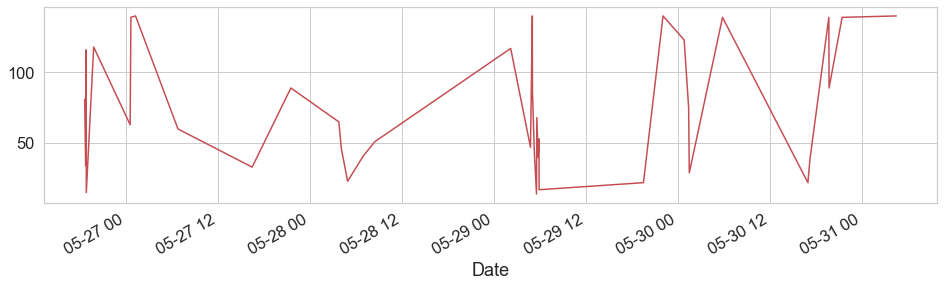

In [100]:
# Length along time:
tlen.plot(figsize=(16,4), color='r');

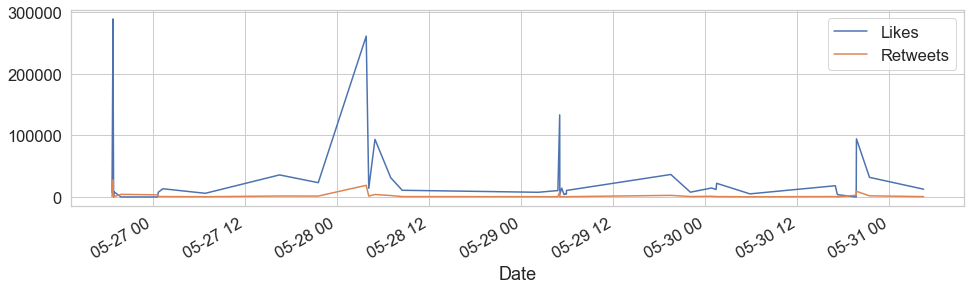

In [101]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

**Perform Sentiment Analysis on Elon Musks' Tweets**
- Elon's twitter can be very unpredictable because of the high volatility of the stock market and in the crypto space. His tweets can move the market in unpredictable ways and so we will find out whether his twitter is positive or negative during this time.

In [105]:
#import textblob to allow for sentiment analysis
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [106]:
# create a column with the result of the analysis:
elon_tweet_data['SA'] = np.array([ analyze_sentiment(tweet) for tweet in elon_tweet_data['Tweets'] ])

# We display the updated dataframe with the new column:
display(elon_tweet_data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,@ErcXspace @SpaceX @NASASpaceflight @MarcusHou...,140,1399221133711446018,2021-05-31 04:28:09,Twitter for iPhone,12600,607,1
1,@hiddin2urleft @greg16676935420 @blockfolio @B...,139,1399114511202852871,2021-05-30 21:24:28,Twitter for iPhone,31859,1826,0
2,Ocean spaceport Deimos is under construction f...,89,1399088815705399305,2021-05-30 19:42:22,Twitter for iPhone,94411,9169,0
3,"RT @SpaceX: One year ago today, SpaceX launche...",139,1399088337206525952,2021-05-30 19:40:28,Twitter for iPhone,0,2817,1
4,@RenataKonkoly @Tesmanian_com Sehnsucht,39,1399051334339465224,2021-05-30 17:13:25,Twitter for iPhone,3749,218,0
5,@Tesmanian_com Danke!!,22,1399047159467679752,2021-05-30 16:56:50,Twitter for iPhone,18238,679,0
6,@PPathole @nextspaceflight @NASASpaceflight @B...,139,1398879075133886466,2021-05-30 05:48:56,Twitter for iPhone,5050,351,-1
7,@RationalEtienne @kimbal True,29,1398813676396638209,2021-05-30 01:29:03,Twitter for iPhone,22184,634,1
8,@UniverCurious @TechInsider 250M years is only...,75,1398812401298939906,2021-05-30 01:23:59,Twitter for iPhone,12119,717,0
9,@Erdayastronaut @nextspaceflight @NASASpacefli...,123,1398803577380904961,2021-05-30 00:48:56,Twitter for iPhone,14571,1130,0


**Analyzing the results**

In [107]:
# We construct lists with classified tweets:
pos_tweets = [ tweet for index, tweet in enumerate(elon_tweet_data['Tweets']) if elon_tweet_data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(elon_tweet_data['Tweets']) if elon_tweet_data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(elon_tweet_data['Tweets']) if elon_tweet_data['SA'][index] < 0]

In [108]:
# we print the percentages 
print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(elon_tweet_data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(elon_tweet_data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(elon_tweet_data['Tweets'])))

Percentage of positive tweets: 32.5%
Percentage of neutral tweets: 52.5%
Percentage de negative tweets: 15.0%


**Conclusion**
- As displayed in the sentiment analysis, Elon Musk is actually fairly neutral type of individual reflected in 52.5% shown.